In [24]:
# Load libraries
import numpy as np
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import datetime

# Load dataset
dataset = pandas.read_csv('wine_dataset.csv')
print(dataset.shape)
print(dataset.head(20))
print(dataset.info())
# descriptions
print(dataset.describe())

(6497, 13)
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500      

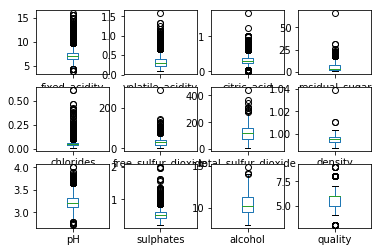

In [25]:
dataset1 = pandas.read_csv('wine_dataset.csv')

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()



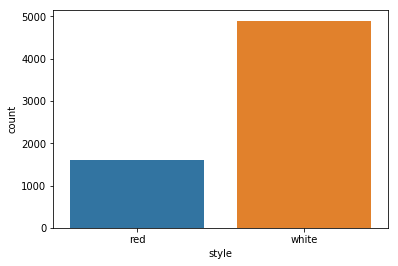

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a158f20f0>,
      dtype=object)

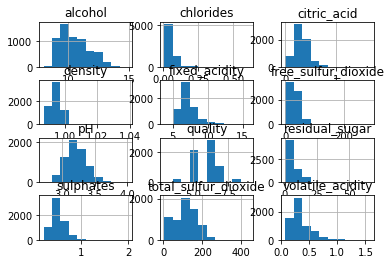

In [26]:
sns.countplot(x="style", data=dataset)
plt.show()


dataset1.hist()

In [14]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:12]
Y = array[:,12]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

LR: 0.981530 (0.005725)
LDA: 0.994998 (0.003005)
KNN: 0.938247 (0.007362)
CART: 0.985571 (0.004322)
NB: 0.971526 (0.006657)
SVM: 0.945171 (0.008446)


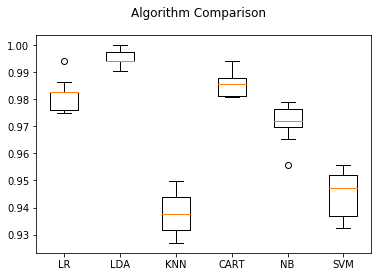

In [16]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'



# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


# Compare Algorithms
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

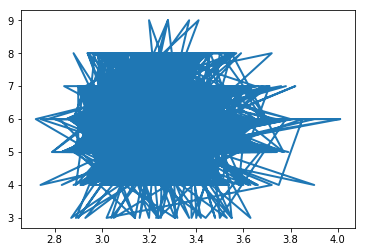

In [39]:

fixed_acidity=dataset['pH']
quality=dataset['quality']

plt.plot(fixed_acidity, (quality), linewidth=2.0)
plt.show()

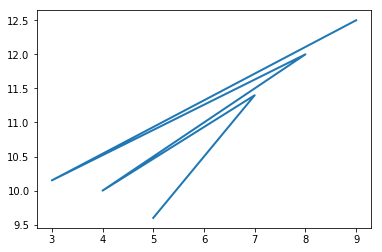

In [60]:
wine_quality=dataset['quality'].unique()
wine_quality
list=[]

for i in wine_quality:
    #print(i)
    dataset1=dataset[ dataset['quality'] == i ]
    #print( np.mean(dataset1['fixed_acidity']) )
    list.append(np.median(dataset1['alcohol']))

plt.plot(wine_quality, list, linewidth=2.0)
plt.show()